Task3


In [ ]:
format ELF64
public _start

section '.bss' writable
    input_fd     dq 0
    output_fd    dq 0
    bytes_read   dq 0
    line_count   dq 0

section '.data' writable
    newline      db 0x0A
    BUFFER_SIZE equ 65536
    buffer       rb BUFFER_SIZE
    line_ptrs    rq 10000

section '.text' executable
_start:
    pop rcx
    cmp rcx, 3
    jl exit_program

    pop rsi
    pop rdi
    pop rbx

    mov rax, 2
    mov rsi, 0
    syscall
    test rax, rax
    js exit_program
    mov [input_fd], rax

    mov rax, 0
    mov rdi, [input_fd]
    mov rsi, buffer
    mov rdx, BUFFER_SIZE
    syscall
    test rax, rax
    jle close_input
    mov [bytes_read], rax

close_input:
    mov rax, 3
    mov rdi, [input_fd]
    syscall

    cmp qword [bytes_read], 0
    je exit_program

    mov rax, 2
    mov rdi, rbx
    mov rsi, 0x241
    mov rdx, 644q
    syscall
    test rax, rax
    js exit_program
    mov [output_fd], rax

    mov rsi, buffer
    mov rdi, line_ptrs
    mov rbx, [bytes_read]
    mov qword [line_count], 1

    mov [rdi], rsi
    add rdi, 8

parse_loop:
    test rbx, rbx
    jz parse_done

    cmp byte [rsi], 0x0A
    jne next_byte

    mov byte [rsi], 0

    inc rsi
    dec rbx
    jz parse_done

    mov [rdi], rsi
    inc qword [line_count]
    add rdi, 8
    jmp parse_loop

next_byte:
    inc rsi
    dec rbx
    jmp parse_loop

parse_done:
    mov rcx, [line_count]
    test rcx, rcx
    jz close_output

    dec rcx

write_loop:
    push rcx

    mov rax, rcx
    shl rax, 3
    mov rsi, [line_ptrs + rax]

    mov rdi, rsi
    xor rax, rax

strlen_loop:
    cmp byte [rdi + rax], 0
    je strlen_done
    inc rax
    jmp strlen_loop

strlen_done:
    mov rdx, rax

    test rdx, rdx
    jz write_newline

    mov rax, 1
    mov rdi, [output_fd]
    syscall

write_newline:
    cmp qword [rsp], 0
    je next_line

    mov rax, 1
    mov rdi, [output_fd]
    mov rsi, newline
    mov rdx, 1
    syscall

next_line:
    pop rcx
    dec rcx
    jns write_loop

close_output:
    mov rax, 3
    mov rdi, [output_fd]
    syscall

exit_program:
    mov rax, 60
    xor rdi, rdi
    syscall


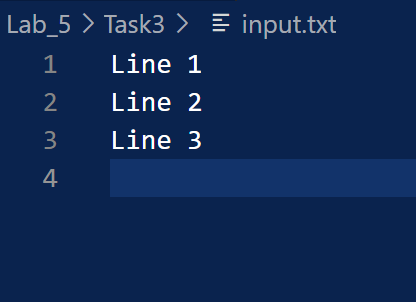

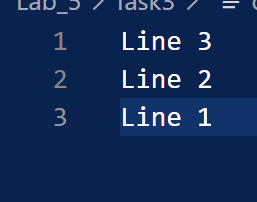

Task10

In [ ]:
format elf64
public _start

section '.bss' writable
    buffer rb 1000
    sent_buf rb 1000
    buf2 rb 1000

section '.data' writable
    space db " "

section '.text' executable

_start:
    mov rdi, [rsp+16]
    mov rax, 2
    mov rsi, 0
    syscall
    cmp rax, 0
    jl l1

    mov r8, rax

    mov rdi, [rsp + 24]
    mov rax, 2
    mov rsi, 577
    mov rdx, 644q
    syscall
    cmp rax, 0
    jl l1

    mov r10, rax

    mov rax, 0
    mov rdi, r8
    mov rsi, buffer
    mov rdx, 1000
    syscall
    cmp rax, 0
    jle close_input
    mov r9, rax

close_input:
    mov rax, 3
    mov rdi, r8
    syscall

    cmp r9, 0
    je l1

    mov rdi, sent_buf
    xor rcx, rcx

next_char:
    cmp rcx, r9
    je end_of_text

    mov al, [buffer + rcx]
    inc rcx

    mov [rdi], al
    inc rdi

    cmp al, '.'
    je .end_sentence
    cmp al, '!'
    je .end_sentence
    cmp al, '?'
    je .end_sentence

    jmp next_char

.end_sentence:
    mov byte [rdi], 0

    mov rsi, sent_buf
    mov rdx, rdi
    sub rdx, sent_buf

    push rdx

    call revert_rsi

    pop rdx

    call write_sentence

    mov rdi, sent_buf
    jmp next_char

revert_rsi:
    push rax
    push rbx
    push rcx
    push rdx

    xor rcx, rcx

.iter:
    mov rbx, rdx
    sub rbx, rcx

    mov al, [rsi + rcx]
    mov [buf2 + rbx], al
    inc rcx
    cmp rcx, rdx
    jl .iter
    mov rcx, 0

.copy_back:
    mov al, [buf2 + rcx + 1]
    mov [sent_buf + rcx], al
    inc rcx
    cmp rcx, rdx
    jl .copy_back

    pop rdx
    pop rcx
    pop rbx
    pop rax
    ret

write_sentence:
    push rdi
    push rsi
    push rax
    push rcx
    push rdx

    mov rax, 1
    mov rdi, r10
    mov rsi, sent_buf
    syscall

    mov rax, 1
    mov rdi, r10
    mov rsi, space
    mov rdx, 1
    syscall

    pop rdx
    pop rcx
    pop rax
    pop rsi
    pop rdi
    ret

end_of_text:
    mov rdi, r8
    mov rax, 3
    syscall
    mov rdi, r10
    syscall

l1:
    call exit

exit:
    mov rax, 60
    xor rdi, rdi
    syscall


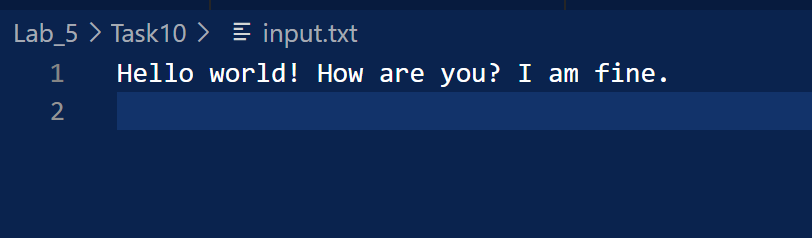

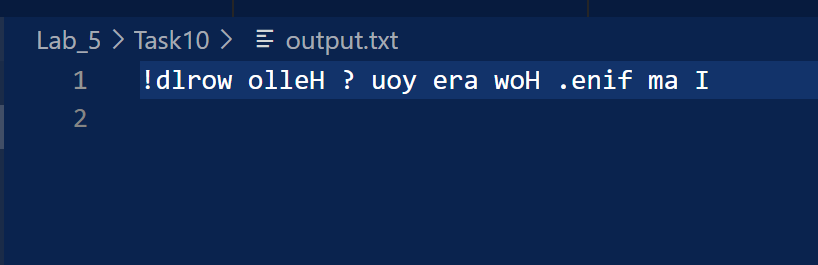